# Computing Psychological Capital from LTS
In this section we will combine the LTS data of each firm, that we previously genereated, with the data on the psychological capital of each firm.

In [1]:
from HelperFunctions import printProgressBar, loadObject, dumpObject
from Definitions import ORG_PSY_CAP_DIR, LTS_IMPROVED, LTS_DIR
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

In [2]:
%%html
<style>
.dataframe td {
    white-space: nowrap;
}
</style>

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 400)

## LTS data
Let's load the LTS data, that we already generated in the previous step.

In [4]:
df_LTS = loadObject("df_LTS")
df_LTS.head()

lts_filePath  \
0  E:\00_git\invact\internal_Data\lts_improved_data_set\001075_PINNACLE WEST CAPITAL CORP_2000.txt   
1  E:\00_git\invact\internal_Data\lts_improved_data_set\001075_PINNACLE WEST CAPITAL CORP_2001.txt   
2  E:\00_git\invact\internal_Data\lts_improved_data_set\001075_PINNACLE WEST CAPITAL CORP_2002.txt   
3  E:\00_git\invact\internal_Data\lts_improved_data_set\001075_PINNACLE WEST CAPITAL CORP_2004.txt   
4  E:\00_git\invact\internal_Data\lts_improved_data_set\001075_PINNACLE WEST CAPITAL CORP_2005.txt   

   lts_gvkey            lts_company name  lts_finYear  
0       1075  PINNACLE WEST CAPITAL CORP         2000  
1       1075  PINNACLE WEST CAPITAL CORP         2001  
2       1075  PINNACLE WEST CAPITAL CORP         2002  
3       1075  PINNACLE WEST CAPITAL CORP         2004  
4       1075  PINNACLE WEST CAPITAL CORP         2005

## Computing OPC data
Now, we have to run the CAT program, which can be downloaded [here](http://www.catscanner.net/). 
The 4 dictionaries needed to compute the Psychological Capital (PsyCap), can also be found on the site (see [here](http://www.catscanner.net/dictionaries/)).

After running the program CAT with all four dictionaries on all files, we can load the results from a csv file. For this you have to make sure to save the results of the program as *OrgPsyCap.csv* to the following folder:

In [5]:
print(ORG_PSY_CAP_DIR)

E:\00_git\invact\input_Data\org_psy_cap


**Important** Please make sure, that you compute the PsyCap for the improved LTS files, and not the original LTS files.

The folder containing the improved files can be found here:

In [6]:
print(LTS_IMPROVED)

E:\00_git\invact\internal_Data\lts_improved_data_set


<font color=red> DO **NOT** USE THE FILES FROM THE FOLLOWING FOLDER: </font>

In [7]:
print(LTS_DIR)

E:\00_git\invact\input_Data\lts


## Importing OPC data
Now that we have run the CAT program on the improved LTS files, we can load the results which are stored in a csv file into our program.

In [8]:
df_opc = pd.read_csv(ORG_PSY_CAP_DIR / "OrgPsyCap.csv")
df_opc = df_opc.add_prefix('opc_')

Let's have a look at the imported data:

In [9]:
df_opc

opc_Filename  opc_Index_Text  \
0     001075_PINNACLE WEST CAPITAL CORP_2000.txt             NaN   
1     001075_PINNACLE WEST CAPITAL CORP_2001.txt             NaN   
2     001075_PINNACLE WEST CAPITAL CORP_2002.txt             NaN   
3     001075_PINNACLE WEST CAPITAL CORP_2004.txt             NaN   
4     001075_PINNACLE WEST CAPITAL CORP_2005.txt             NaN   
...                                          ...             ...   
8327                316056_ALLEGION PLC_2014.txt             NaN   
8328                316056_ALLEGION PLC_2015.txt             NaN   
8329                316056_ALLEGION PLC_2016.txt             NaN   
8330                316056_ALLEGION PLC_2017.txt             NaN   
8331                316056_ALLEGION PLC_2018.txt             NaN   

      opc_Total_Words  opc_Total_Characters  opc_OrgPsyCapConfidence  \
0                1225                  6516                       20   
1                2237                 12317                       51   
2                1930                 10471                       21   
3                2050                 11083                       32   
4                2040                 11067                       22   
...               ...                   ...                      ...   
8327              458                  2346                        5   
8328              594                  3384                        3   
8329             1561                  8639                       32   
8330              940                  5155                       13   
8331              438                  2295                        4   

      opc_OrgPsyCapHope  opc_OrgPsyCapOptimism  opc_OrgPsyCapResilience  
0                    20                      5                        3  
1                    19                      7                       16  
2                    13                      3                       13  
3                    16                      5                        6  
4                    22                      5                        4  
...                 ...                    ...                      ...  
8327                  5                      0                        2  
8328                 14                      3                        5  
8329                 44                     17                       19  
8330                 16                      5                       12  
8331                  7                      2                        1  

[8332 rows x 8 columns]

In [10]:
df_opc.describe()

opc_Index_Text  opc_Total_Words  opc_Total_Characters  \
count             0.0      8332.000000           8332.000000   
mean              NaN      1685.079693           9080.408425   
std               NaN      1315.996048           6789.235937   
min               NaN         0.000000              0.000000   
25%               NaN      1007.000000           5486.250000   
50%               NaN      1416.000000           7688.500000   
75%               NaN      1988.000000          10776.250000   
max               NaN     33750.000000         171318.000000   

       opc_OrgPsyCapConfidence  opc_OrgPsyCapHope  opc_OrgPsyCapOptimism  \
count              8332.000000        8332.000000            8332.000000   
mean                 14.890783          14.390302               6.000120   
std                   9.811307          10.969490               5.222306   
min                   0.000000           0.000000               0.000000   
25%                   8.000000           7.000000               3.000000   
50%                  13.000000          12.000000               5.000000   
75%                  19.000000          19.000000               8.000000   
max                 188.000000         156.000000             113.000000   

       opc_OrgPsyCapResilience  
count              8332.000000  
mean                  6.263802  
std                   5.071878  
min                   0.000000  
25%                   3.000000  
50%                   5.000000  
75%                   8.000000  
max                  94.000000

We can see that the column IndexText is empty for all rows. We can also see the mean value, standard deviation, minimum, maximum and other statistical descriptors for all value types. 

## Pre-Merging
If we now want to merge the OPC data with the LTS data we need a common primary key.
For this we can use the filename.
As the dataframe LTS does not yet contain a column with the corresponding filenames (only contains the filepath), we have to create such column.

In [11]:
print("Mapping path to filename.")
df_LTS["lts_fileName"] = list(map(lambda fp: Path(fp).name, df_LTS["lts_filePath"]))
print("Finished mapping path to filename.")

Mapping path to filename.
Finished mapping path to filename.


In [12]:
df_LTS

lts_filePath  \
0     E:\00_git\invact\internal_Data\lts_improved_data_set\001075_PINNACLE WEST CAPITAL CORP_2000.txt   
1     E:\00_git\invact\internal_Data\lts_improved_data_set\001075_PINNACLE WEST CAPITAL CORP_2001.txt   
2     E:\00_git\invact\internal_Data\lts_improved_data_set\001075_PINNACLE WEST CAPITAL CORP_2002.txt   
3     E:\00_git\invact\internal_Data\lts_improved_data_set\001075_PINNACLE WEST CAPITAL CORP_2004.txt   
4     E:\00_git\invact\internal_Data\lts_improved_data_set\001075_PINNACLE WEST CAPITAL CORP_2005.txt   
...                                                                                               ...   
8327                E:\00_git\invact\internal_Data\lts_improved_data_set\316056_ALLEGION PLC_2014.txt   
8328                E:\00_git\invact\internal_Data\lts_improved_data_set\316056_ALLEGION PLC_2015.txt   
8329                E:\00_git\invact\internal_Data\lts_improved_data_set\316056_ALLEGION PLC_2016.txt   
8330                E:\00_git\invact\internal_Data\lts_improved_data_set\316056_ALLEGION PLC_2017.txt   
8331                E:\00_git\invact\internal_Data\lts_improved_data_set\316056_ALLEGION PLC_2018.txt   

      lts_gvkey            lts_company name  lts_finYear  \
0          1075  PINNACLE WEST CAPITAL CORP         2000   
1          1075  PINNACLE WEST CAPITAL CORP         2001   
2          1075  PINNACLE WEST CAPITAL CORP         2002   
3          1075  PINNACLE WEST CAPITAL CORP         2004   
4          1075  PINNACLE WEST CAPITAL CORP         2005   
...         ...                         ...          ...   
8327     316056                ALLEGION PLC         2014   
8328     316056                ALLEGION PLC         2015   
8329     316056                ALLEGION PLC         2016   
8330     316056                ALLEGION PLC         2017   
8331     316056                ALLEGION PLC         2018   

                                    lts_fileName  
0     001075_PINNACLE WEST CAPITAL CORP_2000.txt  
1     001075_PINNACLE WEST CAPITAL CORP_2001.txt  
2     001075_PINNACLE WEST CAPITAL CORP_2002.txt  
3     001075_PINNACLE WEST CAPITAL CORP_2004.txt  
4     001075_PINNACLE WEST CAPITAL CORP_2005.txt  
...                                          ...  
8327                316056_ALLEGION PLC_2014.txt  
8328                316056_ALLEGION PLC_2015.txt  
8329                316056_ALLEGION PLC_2016.txt  
8330                316056_ALLEGION PLC_2017.txt  
8331                316056_ALLEGION PLC_2018.txt  

[8332 rows x 5 columns]

## Merging
We can now merge both frames on the filename.

In [13]:
df_lts_opc = pd.merge(df_LTS, df_opc, how = "left", left_on = ["lts_fileName"], \
                       right_on = ["opc_Filename"])

The merged dataframe named df_lts_opc looks like this:

In [14]:
df_lts_opc

lts_filePath  \
0     E:\00_git\invact\internal_Data\lts_improved_data_set\001075_PINNACLE WEST CAPITAL CORP_2000.txt   
1     E:\00_git\invact\internal_Data\lts_improved_data_set\001075_PINNACLE WEST CAPITAL CORP_2001.txt   
2     E:\00_git\invact\internal_Data\lts_improved_data_set\001075_PINNACLE WEST CAPITAL CORP_2002.txt   
3     E:\00_git\invact\internal_Data\lts_improved_data_set\001075_PINNACLE WEST CAPITAL CORP_2004.txt   
4     E:\00_git\invact\internal_Data\lts_improved_data_set\001075_PINNACLE WEST CAPITAL CORP_2005.txt   
...                                                                                               ...   
8327                E:\00_git\invact\internal_Data\lts_improved_data_set\316056_ALLEGION PLC_2014.txt   
8328                E:\00_git\invact\internal_Data\lts_improved_data_set\316056_ALLEGION PLC_2015.txt   
8329                E:\00_git\invact\internal_Data\lts_improved_data_set\316056_ALLEGION PLC_2016.txt   
8330                E:\00_git\invact\internal_Data\lts_improved_data_set\316056_ALLEGION PLC_2017.txt   
8331                E:\00_git\invact\internal_Data\lts_improved_data_set\316056_ALLEGION PLC_2018.txt   

      lts_gvkey            lts_company name  lts_finYear  \
0          1075  PINNACLE WEST CAPITAL CORP         2000   
1          1075  PINNACLE WEST CAPITAL CORP         2001   
2          1075  PINNACLE WEST CAPITAL CORP         2002   
3          1075  PINNACLE WEST CAPITAL CORP         2004   
4          1075  PINNACLE WEST CAPITAL CORP         2005   
...         ...                         ...          ...   
8327     316056                ALLEGION PLC         2014   
8328     316056                ALLEGION PLC         2015   
8329     316056                ALLEGION PLC         2016   
8330     316056                ALLEGION PLC         2017   
8331     316056                ALLEGION PLC         2018   

                                    lts_fileName  \
0     001075_PINNACLE WEST CAPITAL CORP_2000.txt   
1     001075_PINNACLE WEST CAPITAL CORP_2001.txt   
2     001075_PINNACLE WEST CAPITAL CORP_2002.txt   
3     001075_PINNACLE WEST CAPITAL CORP_2004.txt   
4     001075_PINNACLE WEST CAPITAL CORP_2005.txt   
...                                          ...   
8327                316056_ALLEGION PLC_2014.txt   
8328                316056_ALLEGION PLC_2015.txt   
8329                316056_ALLEGION PLC_2016.txt   
8330                316056_ALLEGION PLC_2017.txt   
8331                316056_ALLEGION PLC_2018.txt   

                                    opc_Filename  opc_Index_Text  \
0     001075_PINNACLE WEST CAPITAL CORP_2000.txt             NaN   
1     001075_PINNACLE WEST CAPITAL CORP_2001.txt             NaN   
2     001075_PINNACLE WEST CAPITAL CORP_2002.txt             NaN   
3     001075_PINNACLE WEST CAPITAL CORP_2004.txt             NaN   
4     001075_PINNACLE WEST CAPITAL CORP_2005.txt             NaN   
...                                          ...             ...   
8327                316056_ALLEGION PLC_2014.txt             NaN   
8328                316056_ALLEGION PLC_2015.txt             NaN   
8329                316056_ALLEGION PLC_2016.txt             NaN   
8330                316056_ALLEGION PLC_2017.txt             NaN   
8331                316056_ALLEGION PLC_2018.txt             NaN   

      opc_Total_Words  opc_Total_Characters  opc_OrgPsyCapConfidence  \
0                1225                  6516                       20   
1                2237                 12317                       51   
2                1930                 10471                       21   
3                2050                 11083                       32   
4                2040                 11067                       22   
...               ...                   ...                      ...   
8327              458                  2346                        5   
8328              594                  3384                        3   
8329             

We will not need all columns for the subsequent steps. We will drop:
* lts_filename: only needed for merging as filePath information is more informative and will therefore be kept instead.
* opc_filename: only needed for merging as filePath information is more informative and will therefore be kept instead.
* opc_Index_Text: contains only NaN values

In [15]:
relevant_columns = [
    "lts_filePath",
    "lts_gvkey",
    "lts_company name",
    "lts_finYear",
    "opc_Total_Words",
    "opc_Total_Characters",
    "opc_OrgPsyCapConfidence",
    "opc_OrgPsyCapHope",
    "opc_OrgPsyCapOptimism",
    "opc_OrgPsyCapResilience",   
]
df_lts_opc = df_lts_opc[[*relevant_columns]]

The resulting dataframe look like the following:

In [16]:
df_lts_opc

lts_filePath  \
0     E:\00_git\invact\internal_Data\lts_improved_data_set\001075_PINNACLE WEST CAPITAL CORP_2000.txt   
1     E:\00_git\invact\internal_Data\lts_improved_data_set\001075_PINNACLE WEST CAPITAL CORP_2001.txt   
2     E:\00_git\invact\internal_Data\lts_improved_data_set\001075_PINNACLE WEST CAPITAL CORP_2002.txt   
3     E:\00_git\invact\internal_Data\lts_improved_data_set\001075_PINNACLE WEST CAPITAL CORP_2004.txt   
4     E:\00_git\invact\internal_Data\lts_improved_data_set\001075_PINNACLE WEST CAPITAL CORP_2005.txt   
...                                                                                               ...   
8327                E:\00_git\invact\internal_Data\lts_improved_data_set\316056_ALLEGION PLC_2014.txt   
8328                E:\00_git\invact\internal_Data\lts_improved_data_set\316056_ALLEGION PLC_2015.txt   
8329                E:\00_git\invact\internal_Data\lts_improved_data_set\316056_ALLEGION PLC_2016.txt   
8330                E:\00_git\invact\internal_Data\lts_improved_data_set\316056_ALLEGION PLC_2017.txt   
8331                E:\00_git\invact\internal_Data\lts_improved_data_set\316056_ALLEGION PLC_2018.txt   

      lts_gvkey            lts_company name  lts_finYear  opc_Total_Words  \
0          1075  PINNACLE WEST CAPITAL CORP         2000             1225   
1          1075  PINNACLE WEST CAPITAL CORP         2001             2237   
2          1075  PINNACLE WEST CAPITAL CORP         2002             1930   
3          1075  PINNACLE WEST CAPITAL CORP         2004             2050   
4          1075  PINNACLE WEST CAPITAL CORP         2005             2040   
...         ...                         ...          ...              ...   
8327     316056                ALLEGION PLC         2014              458   
8328     316056                ALLEGION PLC         2015              594   
8329     316056                ALLEGION PLC         2016             1561   
8330     316056                ALLEGION PLC         2017              940   
8331     316056                ALLEGION PLC         2018              438   

      opc_Total_Characters  opc_OrgPsyCapConfidence  opc_OrgPsyCapHope  \
0                     6516                       20                 20   
1                    12317                       51                 19   
2                    10471                       21                 13   
3                    11083                       32                 16   
4                    11067                       22                 22   
...                    ...                      ...                ...   
8327                  2346                        5                  5   
8328                  3384                        3                 14   
8329                  8639                       32                 44   
8330                  5155                       13                 16   
8331                  2295                        4                  7   

      opc_OrgPsyCapOptimism  opc_OrgPsyCapResilience  
0                         5                        3  
1                         7                       16  
2                         3                       13  
3                         5                        6  
4                         5                        4  
...                     ...                      ...  
8327                      0                        2  
8328                      3                        5  
8329                     17                       19  
8330                      5                       12  
8331                      2                        1  

[8332 rows x 10 columns]

### Removing rows that have no value
Let's also quickly check, if there are rows, that do not contain usable data.

In [17]:
df_lts_opc[df_lts_opc["opc_Total_Words"] < 100]

lts_filePath  \
336   E:\00_git\invact\internal_Data\lts_improved_data_set\001794_ASHLAND GLOBAL HOLDINGS INC_2010.txt   
1092      E:\00_git\invact\internal_Data\lts_improved_data_set\003502_COOPER TIRE & RUBBER CO_2008.txt   
2247     E:\00_git\invact\internal_Data\lts_improved_data_set\006136_INTERPUBLIC GROUP OF COS_2017.txt   
2347                    E:\00_git\invact\internal_Data\lts_improved_data_set\006502_KROGER CO_2016.txt   
4050        E:\00_git\invact\internal_Data\lts_improved_data_set\010499_TEXAS INSTRUMENTS INC_2016.txt   
6008                      E:\00_git\invact\internal_Data\lts_improved_data_set\028119_GGP INC_2008.txt   
6947         E:\00_git\invact\internal_Data\lts_improved_data_set\065290_SL GREEN REALTY CORP_2014.txt   
7003      E:\00_git\invact\internal_Data\lts_improved_data_set\065772_METTLER-TOLEDO INTL INC_2008.txt   
7979             E:\00_git\invact\internal_Data\lts_improved_data_set\165052_UNDER ARMOUR INC_2016.txt   

      lts_gvkey             lts_company name  lts_finYear  opc_Total_Words  \
336        1794  ASHLAND GLOBAL HOLDINGS INC         2010                6   
1092       3502      COOPER TIRE & RUBBER CO         2008                1   
2247       6136     INTERPUBLIC GROUP OF COS         2017               61   
2347       6502                    KROGER CO         2016                0   
4050      10499        TEXAS INSTRUMENTS INC         2016               68   
6008      28119                      GGP INC         2008               31   
6947      65290         SL GREEN REALTY CORP         2014                0   
7003      65772      METTLER-TOLEDO INTL INC         2008               69   
7979     165052             UNDER ARMOUR INC         2016               65   

      opc_Total_Characters  opc_OrgPsyCapConfidence  opc_OrgPsyCapHope  \
336                   8443                        0                  0   
1092                  5123                        0                  0   
2247                   352                        2                  0   
2347                     0                        0                  0   
4050                   354                        1                  0   
6008                   174                        0                  0   
6947                     0                        0                  0   
7003                   446                        0                  0   
7979                   341                        0                  0   

      opc_OrgPsyCapOptimism  opc_OrgPsyCapResilience  
336                       0                        0  
1092                      0                        0  
2247                      0                        0  
2347                      0                        0  
4050                      0                        0  
6008                      0                        0  
6947                      0                        0  
7003                      1                        0  
7979                      0                        0

In [18]:
df_lts_opc = df_lts_opc[df_lts_opc["opc_Total_Words"] >= 100]
df_lts_opc

lts_filePath  \
0     E:\00_git\invact\internal_Data\lts_improved_data_set\001075_PINNACLE WEST CAPITAL CORP_2000.txt   
1     E:\00_git\invact\internal_Data\lts_improved_data_set\001075_PINNACLE WEST CAPITAL CORP_2001.txt   
2     E:\00_git\invact\internal_Data\lts_improved_data_set\001075_PINNACLE WEST CAPITAL CORP_2002.txt   
3     E:\00_git\invact\internal_Data\lts_improved_data_set\001075_PINNACLE WEST CAPITAL CORP_2004.txt   
4     E:\00_git\invact\internal_Data\lts_improved_data_set\001075_PINNACLE WEST CAPITAL CORP_2005.txt   
...                                                                                               ...   
8327                E:\00_git\invact\internal_Data\lts_improved_data_set\316056_ALLEGION PLC_2014.txt   
8328                E:\00_git\invact\internal_Data\lts_improved_data_set\316056_ALLEGION PLC_2015.txt   
8329                E:\00_git\invact\internal_Data\lts_improved_data_set\316056_ALLEGION PLC_2016.txt   
8330                E:\00_git\invact\internal_Data\lts_improved_data_set\316056_ALLEGION PLC_2017.txt   
8331                E:\00_git\invact\internal_Data\lts_improved_data_set\316056_ALLEGION PLC_2018.txt   

      lts_gvkey            lts_company name  lts_finYear  opc_Total_Words  \
0          1075  PINNACLE WEST CAPITAL CORP         2000             1225   
1          1075  PINNACLE WEST CAPITAL CORP         2001             2237   
2          1075  PINNACLE WEST CAPITAL CORP         2002             1930   
3          1075  PINNACLE WEST CAPITAL CORP         2004             2050   
4          1075  PINNACLE WEST CAPITAL CORP         2005             2040   
...         ...                         ...          ...              ...   
8327     316056                ALLEGION PLC         2014              458   
8328     316056                ALLEGION PLC         2015              594   
8329     316056                ALLEGION PLC         2016             1561   
8330     316056                ALLEGION PLC         2017              940   
8331     316056                ALLEGION PLC         2018              438   

      opc_Total_Characters  opc_OrgPsyCapConfidence  opc_OrgPsyCapHope  \
0                     6516                       20                 20   
1                    12317                       51                 19   
2                    10471                       21                 13   
3                    11083                       32                 16   
4                    11067                       22                 22   
...                    ...                      ...                ...   
8327                  2346                        5                  5   
8328                  3384                        3                 14   
8329                  8639                       32                 44   
8330                  5155                       13                 16   
8331                  2295                        4                  7   

      opc_OrgPsyCapOptimism  opc_OrgPsyCapResilience  
0                         5                        3  
1                         7                       16  
2                         3                       13  
3                         5                        6  
4                         5                        4  
...                     ...                      ...  
8327                      0                        2  
8328                      3                        5  
8329                     17                       19  
8330                      5                       12  
8331                      2                        1  

[8323 rows x 10 columns]

### Removing rows that have no value
Let's also quickly check, if there are rows, where the PsyCap is zero.

In [19]:
df_lts_opc[(df_lts_opc["opc_OrgPsyCapConfidence"] + 
                        df_lts_opc["opc_OrgPsyCapHope"] +
                        df_lts_opc["opc_OrgPsyCapOptimism"] + 
                        df_lts_opc["opc_OrgPsyCapResilience"]) == 0 ]

lts_filePath  \
1414  E:\00_git\invact\internal_Data\lts_improved_data_set\004321_EMERSON ELECTRIC CO_2006.txt   
1415  E:\00_git\invact\internal_Data\lts_improved_data_set\004321_EMERSON ELECTRIC CO_2007.txt   
1416  E:\00_git\invact\internal_Data\lts_improved_data_set\004321_EMERSON ELECTRIC CO_2008.txt   
1417  E:\00_git\invact\internal_Data\lts_improved_data_set\004321_EMERSON ELECTRIC CO_2009.txt   
2839      E:\00_git\invact\internal_Data\lts_improved_data_set\007620_MURPHY OIL CORP_2015.txt   
3800   E:\00_git\invact\internal_Data\lts_improved_data_set\009882_SOUTHWEST AIRLINES_2000.txt   

      lts_gvkey     lts_company name  lts_finYear  opc_Total_Words  \
1414       4321  EMERSON ELECTRIC CO         2006              354   
1415       4321  EMERSON ELECTRIC CO         2007              224   
1416       4321  EMERSON ELECTRIC CO         2008              673   
1417       4321  EMERSON ELECTRIC CO         2009              314   
2839       7620      MURPHY OIL CORP         2015              312   
3800       9882   SOUTHWEST AIRLINES         2000              505   

      opc_Total_Characters  opc_OrgPsyCapConfidence  opc_OrgPsyCapHope  \
1414                  8485                        0                  0   
1415                  5581                        0                  0   
1416                 14391                        0                  0   
1417                 10282                        0                  0   
2839                  1520                        0                  0   
3800                  2615                        0                  0   

      opc_OrgPsyCapOptimism  opc_OrgPsyCapResilience  
1414                      0                        0  
1415                      0                        0  
1416                      0                        0  
1417                      0                        0  
2839                      0                        0  
3800                      0                        0

All but the last LTS are unusable. Let's therefore drop them.

In [20]:
indexes = df_lts_opc.index[(df_lts_opc["opc_OrgPsyCapConfidence"] + 
                        df_lts_opc["opc_OrgPsyCapHope"] +
                        df_lts_opc["opc_OrgPsyCapOptimism"] + 
                        df_lts_opc["opc_OrgPsyCapResilience"]) == 0 ].tolist()
indexes = indexes[:5]
df_lts_opc = df_lts_opc.drop(indexes)
df_lts_opc

lts_filePath  \
0     E:\00_git\invact\internal_Data\lts_improved_data_set\001075_PINNACLE WEST CAPITAL CORP_2000.txt   
1     E:\00_git\invact\internal_Data\lts_improved_data_set\001075_PINNACLE WEST CAPITAL CORP_2001.txt   
2     E:\00_git\invact\internal_Data\lts_improved_data_set\001075_PINNACLE WEST CAPITAL CORP_2002.txt   
3     E:\00_git\invact\internal_Data\lts_improved_data_set\001075_PINNACLE WEST CAPITAL CORP_2004.txt   
4     E:\00_git\invact\internal_Data\lts_improved_data_set\001075_PINNACLE WEST CAPITAL CORP_2005.txt   
...                                                                                               ...   
8327                E:\00_git\invact\internal_Data\lts_improved_data_set\316056_ALLEGION PLC_2014.txt   
8328                E:\00_git\invact\internal_Data\lts_improved_data_set\316056_ALLEGION PLC_2015.txt   
8329                E:\00_git\invact\internal_Data\lts_improved_data_set\316056_ALLEGION PLC_2016.txt   
8330                E:\00_git\invact\internal_Data\lts_improved_data_set\316056_ALLEGION PLC_2017.txt   
8331                E:\00_git\invact\internal_Data\lts_improved_data_set\316056_ALLEGION PLC_2018.txt   

      lts_gvkey            lts_company name  lts_finYear  opc_Total_Words  \
0          1075  PINNACLE WEST CAPITAL CORP         2000             1225   
1          1075  PINNACLE WEST CAPITAL CORP         2001             2237   
2          1075  PINNACLE WEST CAPITAL CORP         2002             1930   
3          1075  PINNACLE WEST CAPITAL CORP         2004             2050   
4          1075  PINNACLE WEST CAPITAL CORP         2005             2040   
...         ...                         ...          ...              ...   
8327     316056                ALLEGION PLC         2014              458   
8328     316056                ALLEGION PLC         2015              594   
8329     316056                ALLEGION PLC         2016             1561   
8330     316056                ALLEGION PLC         2017              940   
8331     316056                ALLEGION PLC         2018              438   

      opc_Total_Characters  opc_OrgPsyCapConfidence  opc_OrgPsyCapHope  \
0                     6516                       20                 20   
1                    12317                       51                 19   
2                    10471                       21                 13   
3                    11083                       32                 16   
4                    11067                       22                 22   
...                    ...                      ...                ...   
8327                  2346                        5                  5   
8328                  3384                        3                 14   
8329                  8639                       32                 44   
8330                  5155                       13                 16   
8331                  2295                        4                  7   

      opc_OrgPsyCapOptimism  opc_OrgPsyCapResilience  
0                         5                        3  
1                         7                       16  
2                         3                       13  
3                         5                        6  
4                         5                        4  
...                     ...                      ...  
8327                      0                        2  
8328                      3                        5  
8329                     17                       19  
8330                      5                       12  
8331                      2                        1  

[8318 rows x 10 columns]

Done. We've removed two rows with unusable data.
We can now save the dataframe to the hard disk.

In [21]:
dumpObject(df_lts_opc, "df_lts_opc")

## Descriptive Statistics
Let's get to know the data a bit better.
### Financial years
Let's look at the *fin_year* year data.

In [22]:
df_lts_opc['lts_finYear'].value_counts().sort_index()

2000    168
2001    225
2002    255
2003    288
2004    301
2005    413
2006    476
2007    498
2008    520
2009    534
2010    548
2011    526
2012    538
2013    551
2014    502
2015    513
2016    501
2017    507
2018    454
Name: lts_finYear, dtype: int64

We can also visualize this data:

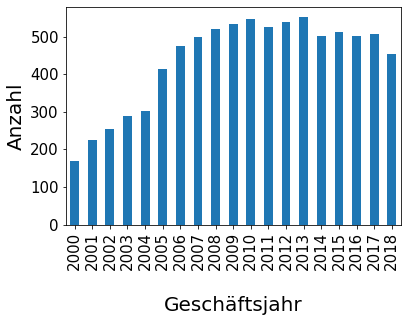

In [23]:
fig, ax = plt.subplots()
plt.xlabel('\nGeschäftsjahr', fontsize=20)
plt.ylabel('Anzahl', fontsize=20)
plt.tick_params(labelsize=15)
df_lts_opc['lts_finYear'].value_counts().sort_index().plot(ax=ax, kind='bar')

We can see, that we have data from the years 2000 to 2018. What we can also see, is that the number of datapoints tends to be larger in later years. For the year 2000 only 168 data points are present.
### Number of companies.


In [24]:
nr_of_distinct_companies = df_lts_opc["lts_gvkey"].nunique()
nr_of_toal_entries = df_lts_opc["lts_gvkey"].size
print(f"There are {str(nr_of_toal_entries)} files in the dataset.")
print(f"There are {str(nr_of_distinct_companies)} of companies in the dataset.")
print("Therefore, there are on average {:.2f} LTS per company.".format(nr_of_toal_entries/nr_of_distinct_companies))

There are 8318 files in the dataset.
There are 697 of companies in the dataset.
Therefore, there are on average 11.93 LTS per company.


## Summary
In this section we loaded 2 types of data:
* LTS data that we have gathered previously and that contains:
    * company name
    * financial year
    * gvkey
* PsyCap data that we gained by running the CAT Scanner program. This data contains:
    * Total Words
    * Total Characters
    * Confidence
    * Hope
    * Optimism
    * Resilience

These two types of' data were merged and then saved to the dataframe *df_lts_opc*.  
We deleted all datapoints, where the word count was below 100, as a short study of these files showed, that these files could not be used for subsequent analysis.  
We also delete all datapoints, where the total PsyCap was zero due to the LTS containing unusable information.